# Medical Data: EDA


## Imports


In [1]:
import sys

# adds everything in the directory above to the path
sys.path.insert(0, '../')

In [2]:
# autoreload all libraries/modules
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

In [4]:
pd.__version__

'2.2.1'

In [5]:
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from thefuzz import fuzz, process
import recordlinkage

Custom


In [7]:
from src.generate_report import check_for_categorical

## Data Import & Initial Data Integrity Checks


In [8]:
path = "../data/medical_raw_data.csv"

medical = pd.read_csv(path)

In [9]:
medical.shape

(10000, 53)

As there are 53 columns, transposing the sample will make the column
names easier to read.


In [10]:
display(medical.sample(5).T)

,7469,7637,4552,3649,7960
Unnamed: 0,7470,7638,4553,3650,7961
CaseOrder,7470,7638,4553,3650,7961
Customer_id,C285195,W138325,E699685,H619398,V160457
Interaction,07a2ffd8-4581-45c0-aa49-1627c43defda,4ffdb642-cef5-469b-9307-5066e0cead1a,8013dff6-2df6-46ff-b1dc-4dc8458d20ef,2f793a05-f544-496c-b66b-22d0283c5cf5,cc387bb0-08f1-4f8b-a0ad-f9fad38f760c
UID,903fbd23bc0f3d1b1c1237f9d39b060c,80cff5e33cb4f637f278051b2c2bd747,ff501b150c577cd82783572318d8d311,5f233f0af717d82bf9425ad1cd95dac9,f63919ff51c26cdbbff1478e84925b1e
City,Whitney,Santa Ana,Lamar,Kulm,Helotes
State,PA,CA,PA,ND,TX
County,Westmoreland,Orange,Clinton,Dickey,Bexar
Zip,15693,92705,16848,58456,78023
Lat,40.25315,33.75567,41.01122,46.26549,29.61087


In [11]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

## Categorical Data

It's good practice to ensure categorical data is defined as such. The
`check_for_categorical` function creates a report and returns a list of
columns where the number of unique value counts remain under a given
threshold (with a default of 30).


In [12]:
possible_categories = check_for_categorical(
    medical,
    file="../reports/medical_cat_report.txt")

In [13]:
print(len(possible_categories))
print(possible_categories)

34
['Area', 'Timezone', 'Children', 'Education', 'Employment', 'Marital', 'Gender', 'ReAdmis', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


Manual inspection suggests that these included column names should not be
considered categorical.

- Children
- Doc_visits
- Full_meals_eaten


In [14]:
for cat in ["Children", "Doc_visits", "Full_meals_eaten"]:

    if cat in possible_categories:
        possible_categories.remove(cat)

Manual inspection indicates that these columns should additionally be
considered categorical:

- City
- State
- County

These should added to the list of columns be cast to a categorical type.


In [15]:
for cat in ["City", "State", "County"]:

    if cat not in possible_categories:
        possible_categories.append(cat)

In [16]:
print(possible_categories)

['Area', 'Timezone', 'Education', 'Employment', 'Marital', 'Gender', 'ReAdmis', 'VitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'City', 'State', 'County']


In [17]:
# cast to categorical
for cat in possible_categories:
    medical[cat] = medical[cat].astype('category')

In [18]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          10000 non-null  int64   
 1   CaseOrder           10000 non-null  int64   
 2   Customer_id         10000 non-null  object  
 3   Interaction         10000 non-null  object  
 4   UID                 10000 non-null  object  
 5   City                10000 non-null  category
 6   State               10000 non-null  category
 7   County              10000 non-null  category
 8   Zip                 10000 non-null  int64   
 9   Lat                 10000 non-null  float64 
 10  Lng                 10000 non-null  float64 
 11  Population          10000 non-null  int64   
 12  Area                10000 non-null  category
 13  Timezone            10000 non-null  category
 14  Job                 10000 non-null  object  
 15  Children            7412 non-null   f

### Categories with custom ordering

- [pandas.DataFrame.astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)


#### Education ordering

The named education categories represent various levels of education. Although some wide differences are very obvious (e.g. `No Schooling Completed` compared to `Doctorate Degree`) A few are a little more ambiguous.

Here is a proposed order.

Education:

- No Schooling Completed
- Nursery School to 8th Grade
- 9th Grade to 12th Grade, No Diploma
- GED or Alternative Credential
- Regular High School Diploma
- Some College, Less than 1 Year
- Some College, 1 or More Years, No Degree
- Associate's Degree
- Bachelor's Degree
- Master's Degree
- Doctorate Degree
- Professional School Degree


In [19]:
ed_order = [
    "No Schooling Completed",
    "Nursery School to 8th Grade",
    "9th Grade to 12th Grade, No Diploma",
    "GED or Alternative Credential",
    "Regular High School Diploma",
    "Some College, Less than 1 Year",
    "Some College, 1 or More Years, No Degree",
    "Associate's Degree",
    "Bachelor's Degree",
    "Master's Degree",
    "Doctorate Degree",
    "Professional School Degree"]

ed_dtype = CategoricalDtype(
    categories=ed_order,
    ordered=True)

medical["Education"] = medical["Education"].astype(ed_dtype)

#### Survey Question ordering


In [20]:
item_order = [8, 7, 6, 5, 4, 3, 2, 1]

item_dtype = CategoricalDtype(
    categories=item_order,
    ordered=True)

for i in range(1, 9):

    medical[f"Item{i}"] = medical[f"Item{i}"].astype(item_dtype)

Zip codes have an additional challenge, as zip codes can begin with
leading zeros.

- Zip


### Confirm categorical


In [21]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          10000 non-null  int64   
 1   CaseOrder           10000 non-null  int64   
 2   Customer_id         10000 non-null  object  
 3   Interaction         10000 non-null  object  
 4   UID                 10000 non-null  object  
 5   City                10000 non-null  category
 6   State               10000 non-null  category
 7   County              10000 non-null  category
 8   Zip                 10000 non-null  int64   
 9   Lat                 10000 non-null  float64 
 10  Lng                 10000 non-null  float64 
 11  Population          10000 non-null  int64   
 12  Area                10000 non-null  category
 13  Timezone            10000 non-null  category
 14  Job                 10000 non-null  object  
 15  Children            7412 non-null   f

### Boolean Categorical

The categories with only 2 unique values present seem to all be coded
`Yes` or `No`. It would be more useful to change these to Boolean values.


In [22]:
possible_boolean = check_for_categorical(
    medical,
    threshold=2,
    file='../reports/boolean_cat_report.txt')

possible_boolean

['ReAdmis',
 'Soft_drink',
 'HighBlood',
 'Stroke',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma']

In [23]:
medical[possible_boolean].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ReAdmis             10000 non-null  category
 1   Soft_drink          7533 non-null   category
 2   HighBlood           10000 non-null  category
 3   Stroke              10000 non-null  category
 4   Overweight          9018 non-null   category
 5   Arthritis           10000 non-null  category
 6   Diabetes            10000 non-null  category
 7   Hyperlipidemia      10000 non-null  category
 8   BackPain            10000 non-null  category
 9   Anxiety             9016 non-null   category
 10  Allergic_rhinitis   10000 non-null  category
 11  Reflux_esophagitis  10000 non-null  category
 12  Asthma              10000 non-null  category
dtypes: category(13)
memory usage: 128.7 KB


- [`pandas.Series.cat.rename_categories`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.cat.rename_categories.html)


In [24]:
for cat in possible_boolean:

    if 'Yes' in list(medical[cat].unique()):

        medical[cat] = medical[cat].cat.rename_categories(
            {'Yes': 1, 'No': 0})

In [25]:
post_convert_boolean = check_for_categorical(
    medical,
    threshold=2,
    file='../reports/boolean_post_convert_report.txt')

In [26]:
medical[possible_categories].describe().T

,count,unique,top,freq
Area,10000,3,Rural,3369
Timezone,10000,26,America/New_York,3889
Education,10000,12,Regular High School Diploma,2444
Employment,10000,5,Full Time,6029
Marital,10000,5,Widowed,2045
Gender,10000,3,Female,5018
ReAdmis,10000,2,0,6331
VitD_supp,10000,6,0,6702
Soft_drink,7533,2,0,5589
Initial_admin,10000,3,Emergency Admission,5060


## Initial missing data check


Columns with missing values

- Children
- Age
- Income
- Soft_drink
- Overweight
- Anxiety
- Initial_days


In [27]:
# Which columns contain null values
def col_contains_nulls(df):

    col_lst = list()

    for col in df.columns[1:]:

        if df[col].isna().sum() > 0:

            col_lst.append(col)

    return col_lst


incomplete_cols = col_contains_nulls(medical)
incomplete_cols

['Children',
 'Age',
 'Income',
 'Soft_drink',
 'Overweight',
 'Anxiety',
 'Initial_days']

<Axes: >

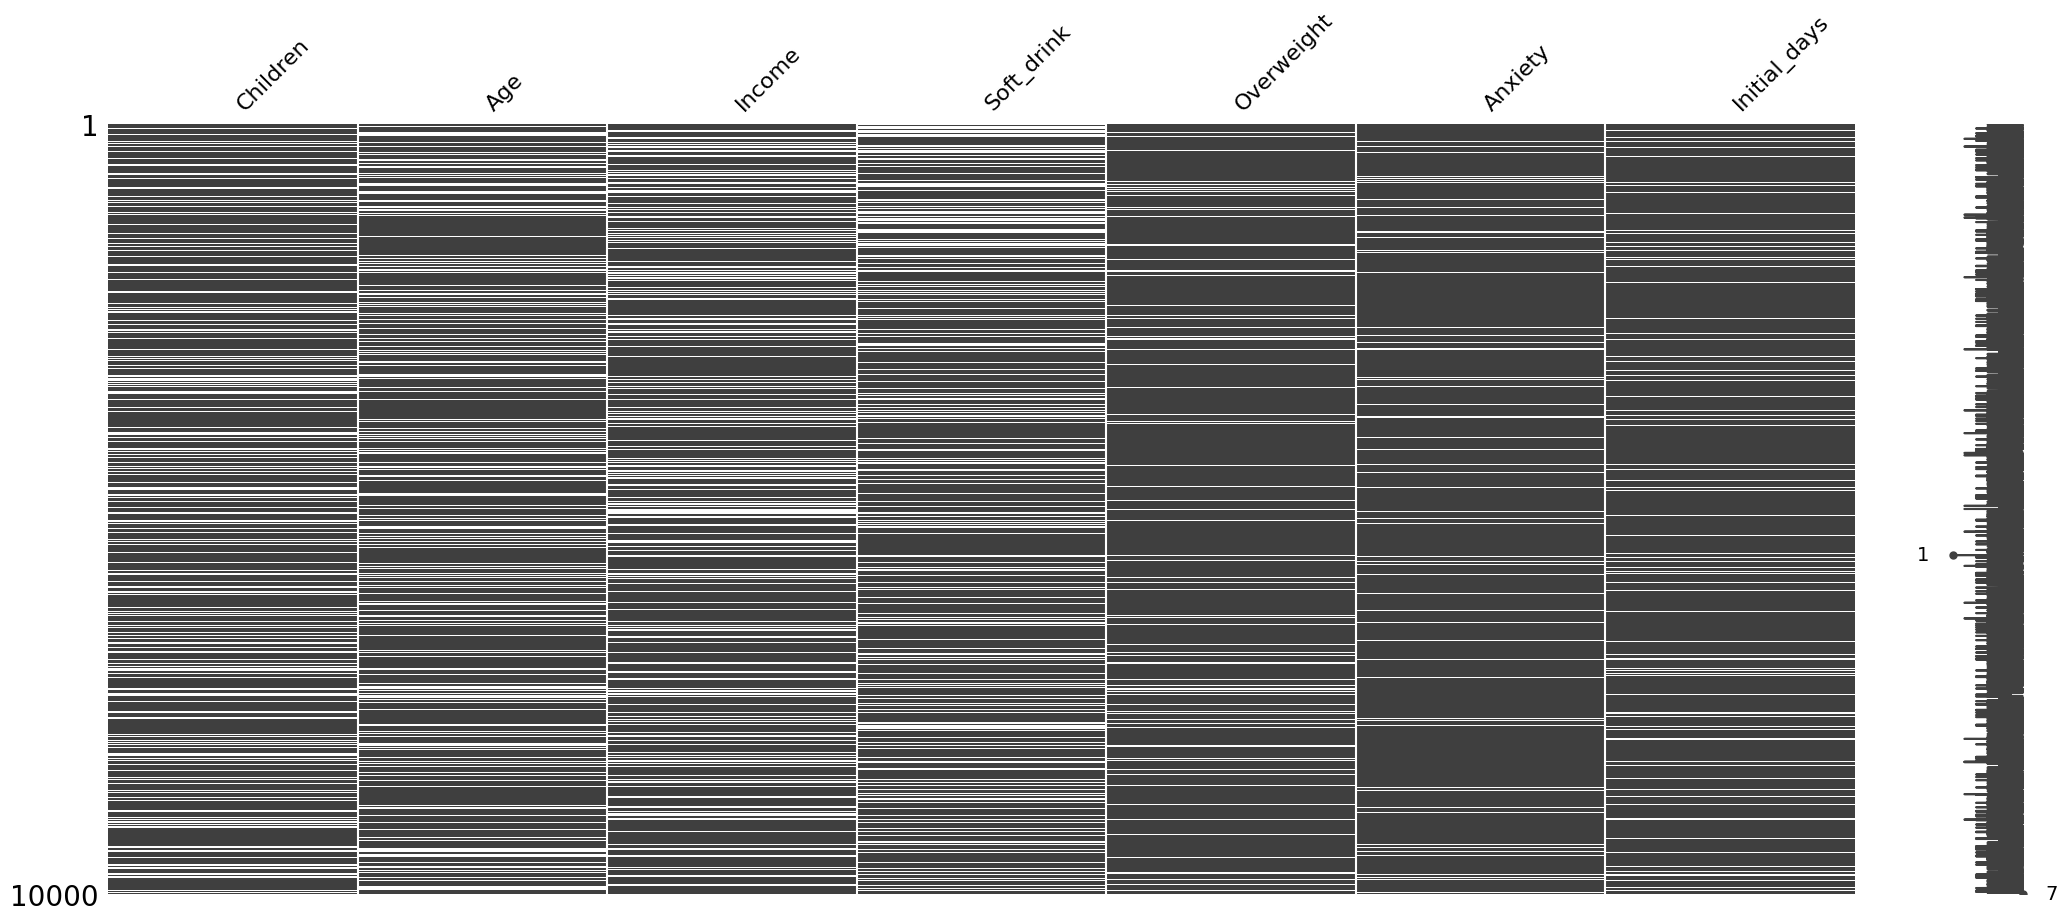

In [28]:
msno.matrix(medical[incomplete_cols])

In [29]:
medical[incomplete_cols].describe()

,Children,Age,Income,Initial_days
count,7412.000000,7586.000000,7536.000000,8944.000000
mean,2.098219,53.295676,40484.438268,34.432082
std,2.155427,20.659182,28664.861050,26.287050
min,0.000000,18.000000,154.080000,1.001981
25%,0.000000,35.000000,19450.792500,7.911709
50%,1.000000,53.000000,33942.280000,34.446941
75%,3.000000,71.000000,54075.235000,61.124654
max,10.000000,89.000000,207249.130000,71.981486


In [30]:
medical[incomplete_cols].isna().sum()

Children        2588
Age             2414
Income          2464
Soft_drink      2467
Overweight       982
Anxiety          984
Initial_days    1056
dtype: int64

In [31]:
medical[incomplete_cols].isna().sum().index

Index(['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety',
       'Initial_days'],
      dtype='object')